<a href="https://colab.research.google.com/github/Prianka-Mukhopadhyay/netflix-data-analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priankamukhopadhyay","key":"dde3521429151eb92c2dc76a3dd4afbc"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!pip install -q kaggle


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

100%|██████████| 1.34M/1.34M [00:00<00:00, 119MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


In [8]:
import pandas as pd

file_path = path + "/netflix_titles.csv"
df = pd.read_csv(file_path)

# Preview the data
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
!cp {path}/netflix_titles.csv /content/netflix_titles.csv
df = pd.read_csv('/content/netflix_titles.csv')


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/netflix_titles.csv')

# Check data structure
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [11]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['cast'].fillna('No Info', inplace=True)
df['director'].fillna('No Info', inplace=True)


<ipython-input-11-f0f5d8d5bde3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
<ipython-input-11-f0f5d8d5bde3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Text(0.5, 1.0, 'Content Type Distribution')

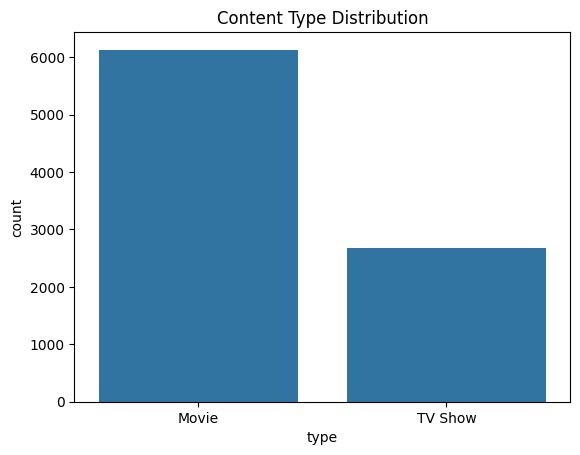

In [12]:
sns.countplot(data=df, x='type')
plt.title('Content Type Distribution')


Text(0.5, 1.0, 'Top 10 Countries on Netflix')

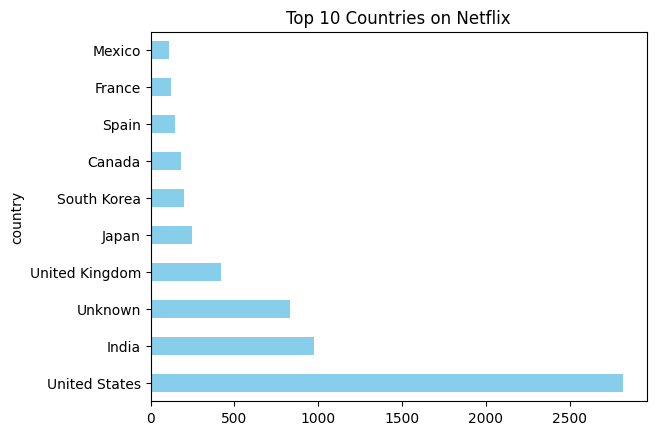

In [13]:
df['country'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries on Netflix')


In [20]:
#df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')


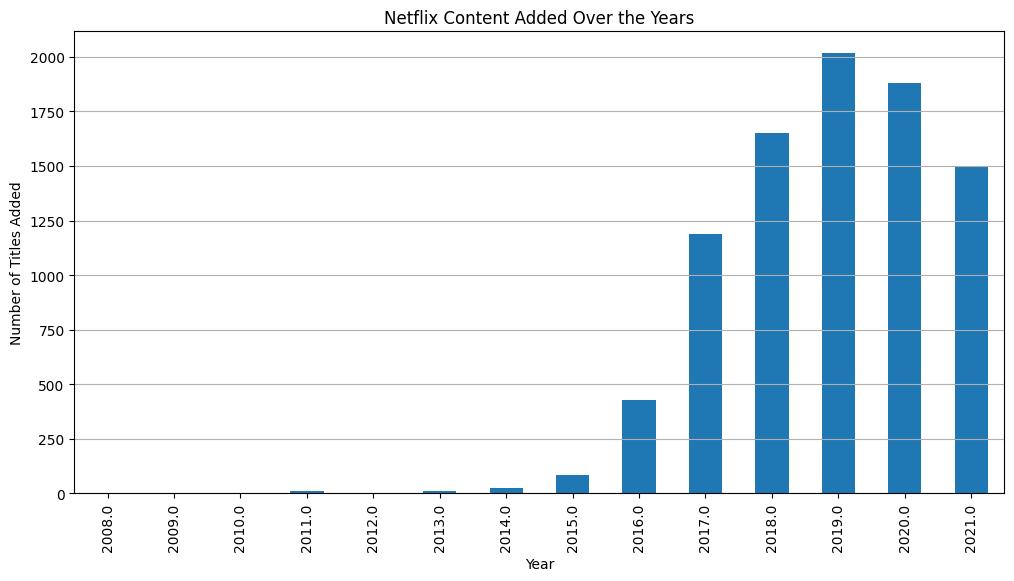

In [22]:
# Clean & convert
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Plot
import matplotlib.pyplot as plt

df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(axis='y')
plt.show()


Text(0.5, 1.0, 'Top Genres on Netflix')

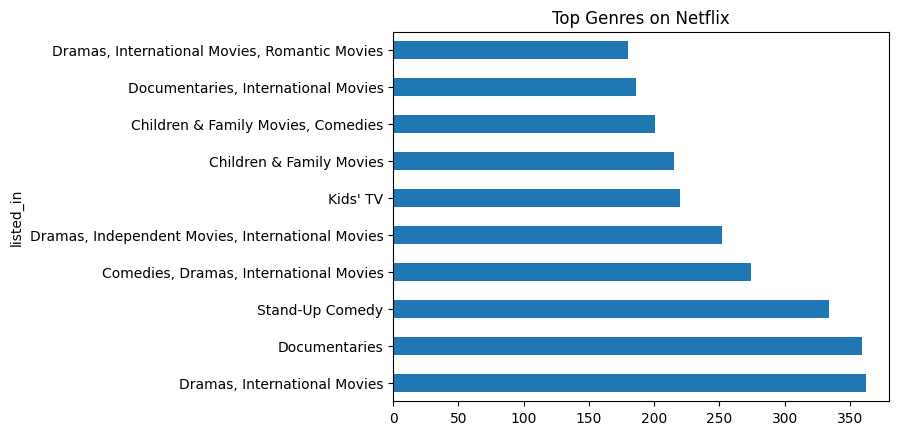

In [25]:
df['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title('Top Genres on Netflix')


<ipython-input-16-8ca3a657eab9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration_mins'] = df_movies['duration'].str.replace(' min','').astype(float)


Text(0.5, 1.0, 'Movie Duration Distribution')

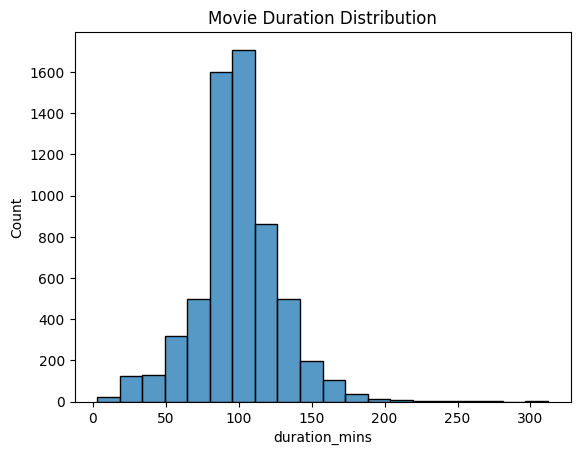

In [16]:
df_movies = df[df['type'] == 'Movie']
df_movies['duration_mins'] = df_movies['duration'].str.replace(' min','').astype(float)
sns.histplot(df_movies['duration_mins'], bins=20)
plt.title('Movie Duration Distribution')


<ipython-input-26-77a2340cdc7d>:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-77a2340cdc7d>:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("visuals/netflix_years_clean.png", dpi=300)


FileNotFoundError: [Errno 2] No such file or directory: 'visuals/netflix_years_clean.png'

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


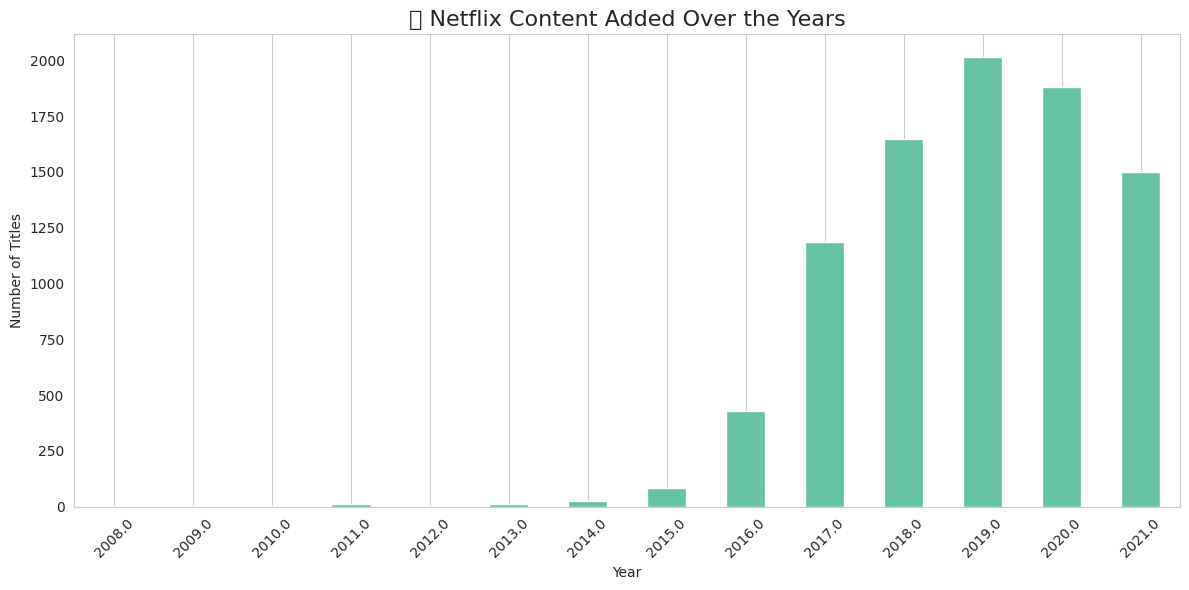

In [26]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('📈 Netflix Content Added Over the Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("visuals/netflix_years_clean.png", dpi=300)
plt.show()
